# Pruebas de bondad de ajuste

### Modelos no paramétricos y de regresión
##### Por: Jorge Iván Reyes Hernández

In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

Suponga que tenemos $n$ datos de alguna distribución y queremos probar si estos datos siguen una distribución en particular.

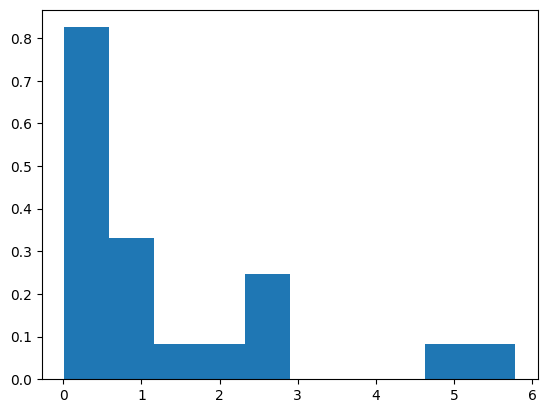

In [2]:
data1 = np.genfromtxt('data1.csv', delimiter=",")
plt.hist(data1, density=True);

Luego de ver el histograma (función de densidad empírica), podría tener sentido preguntarnos si estos datos siguen una distribución exponencial o una gamma.

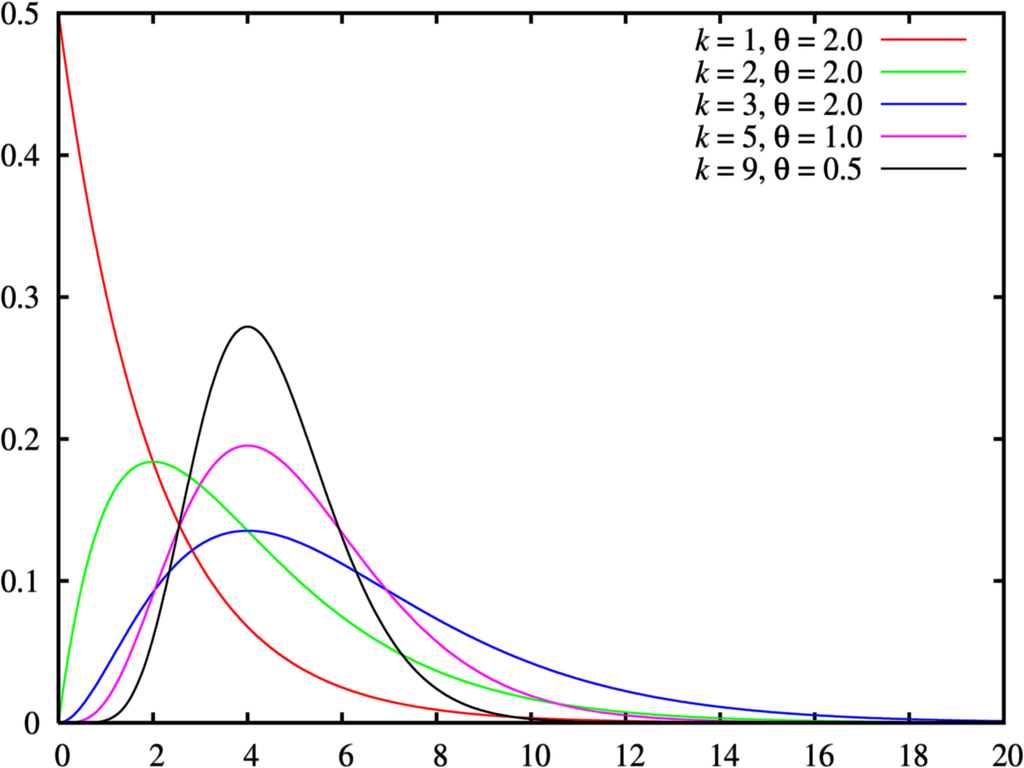

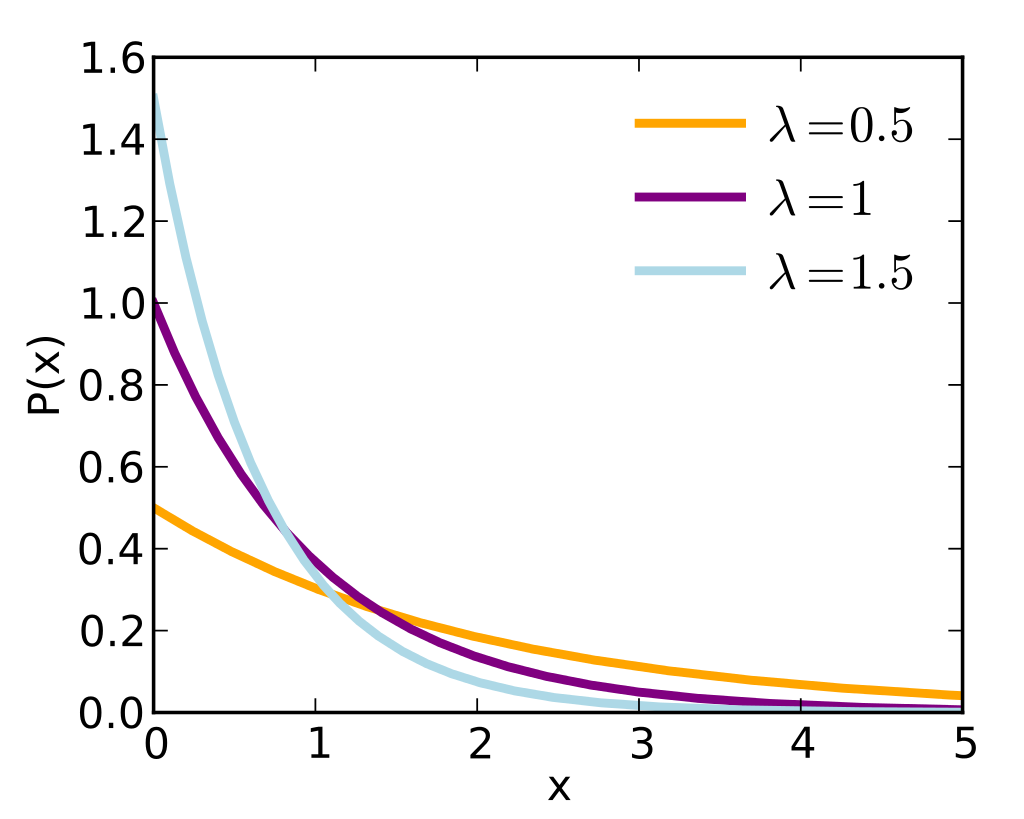

##### a) Kolmogorov-Smirnov test
[Docs stats.kstest](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html)
[Docs stats.ks_1samp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_1samp.html#scipy.stats.ks_1samp)

Queremos probar

$$
H_0 : \text{Los datos se distribuyen } Gamma(1, 2) \text{  v.s  } H_a : \text{Los datos no se distribuyen } Gamma(1, 2)
$$



In [3]:
stats.ks_1samp(data1, cdf=stats.gamma.cdf, args=(1, 2))

KstestResult(statistic=0.7619047619047619, pvalue=3.1444331527416543e-13, statistic_location=1.9271615087232683, statistic_sign=1)

Como $p_{val} = 0.000000000000314$, y si $\alpha=0.05$, entonces $p_{val} \leq \alpha$, por lo que rechazamos $H_0$.

Queremos probar

$$
H_0 : \text{Los datos se distribuyen } exp(1) \text{  v.s  } H_a : \text{Los datos no se distribuyen } exp(1)
$$

In [4]:
stats.ks_1samp(data1, cdf=stats.expon.cdf, args=(0, 1))

KstestResult(statistic=0.15920186846858803, pvalue=0.6059528612506591, statistic_location=0.08217947269298866, statistic_sign=1)

Como $p_{val} = 0.605$, y si $\alpha=0.05$, entonces $p_{val} \leq \alpha$!!!!, por lo que no rechazamos $H_0$.

In [5]:
stats.ks_1samp(data1, cdf=stats.expon.cdf, args=(0, 0.5))

KstestResult(statistic=0.30258254103700855, pvalue=0.033435920574300226, statistic_location=0.8754778841955773, statistic_sign=-1)

In [6]:
stats.ks_1samp(data1, cdf=stats.expon.cdf, args=(0, 0.7))

KstestResult(statistic=0.22198352094642992, pvalue=0.2170377215608018, statistic_location=1.9271615087232683, statistic_sign=-1)

In [7]:
stats.ks_1samp(data1, cdf=stats.expon.cdf, args=(0, 0.9))

KstestResult(statistic=0.17697483700330785, pvalue=0.4731404223136302, statistic_location=2.515418614599691, statistic_sign=-1)

In [8]:
stats.ks_1samp(data1, cdf=stats.expon.cdf, args=(0, 1))

KstestResult(statistic=0.15920186846858803, pvalue=0.6059528612506591, statistic_location=0.08217947269298866, statistic_sign=1)

In [9]:
stats.ks_1samp(data1, cdf=stats.expon.cdf, args=(0, 1.1))

KstestResult(statistic=0.16964392212312088, pvalue=0.5264170960870347, statistic_location=0.1966307389221023, statistic_sign=1)

In [10]:
stats.ks_1samp(data1, cdf=stats.expon.cdf, args=(0, 1.3))

KstestResult(statistic=0.19296230204773893, pvalue=0.367220698939821, statistic_location=0.1966307389221023, statistic_sign=1)

Ahora suponga que se obtienen más mediciones de la misma población...

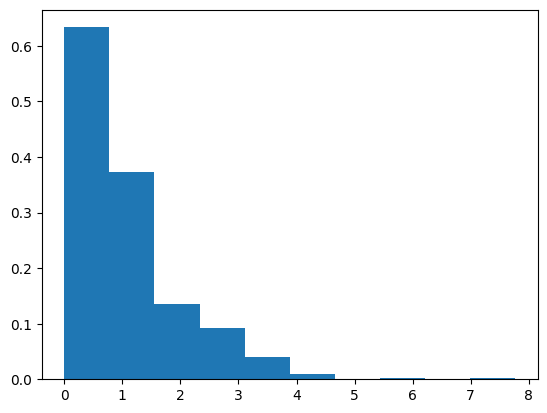

In [11]:
data2 = np.genfromtxt('data2.csv', delimiter=",")
plt.hist(data2, density=True);

In [12]:
for l in np.linspace(0.1, 2.5):
    p = stats.ks_1samp(data1, cdf=stats.expon.cdf, args=(0, l))
    print(f"lambda = {l:.5f} -- p_val = {p.pvalue}")

lambda = 0.10000 -- p_val = 1.1327957908390495e-08
lambda = 0.14898 -- p_val = 2.3781050249312435e-07
lambda = 0.19796 -- p_val = 2.988067550321919e-06
lambda = 0.24694 -- p_val = 3.9627685542254513e-05
lambda = 0.29592 -- p_val = 0.00038812037794855314
lambda = 0.34490 -- p_val = 0.0016834550898696676
lambda = 0.39388 -- p_val = 0.004678630654990967
lambda = 0.44286 -- p_val = 0.012233073909570402
lambda = 0.49184 -- p_val = 0.02920716316094707
lambda = 0.54082 -- p_val = 0.06295658739667587
lambda = 0.58980 -- p_val = 0.12245563019912231
lambda = 0.63878 -- p_val = 0.16106902989655292
lambda = 0.68776 -- p_val = 0.20442792260766018
lambda = 0.73673 -- p_val = 0.25950334500141037
lambda = 0.78571 -- p_val = 0.3276230963775111
lambda = 0.83469 -- p_val = 0.39215425458176734
lambda = 0.88367 -- p_val = 0.4515987835991311
lambda = 0.93265 -- p_val = 0.5186498241100346
lambda = 0.98163 -- p_val = 0.5921744437282002
lambda = 1.03061 -- p_val = 0.5885433327604389
lambda = 1.07959 -- p_val =

Ahora con datos normales

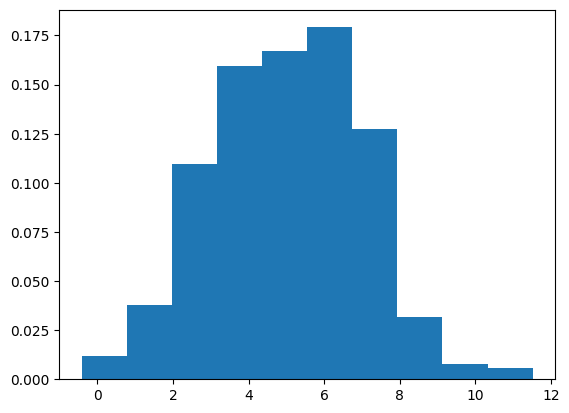

In [13]:
data3 = np.genfromtxt('data3.csv', delimiter=",")
plt.hist(data3, density=True);

##### b) Anderson-Darling
Anderson-Darling test for data coming from a particular distribution.

The Anderson-Darling test tests the null hypothesis that a sample is drawn from a population that follows a particular distribution. For the Anderson-Darling test, the critical values depend on which distribution is being tested against. This function works for normal, exponential, logistic, or Gumbel (Extreme Value Type I) distributions.


If the returned statistic is larger than these critical values then for the corresponding significance level, the null hypothesis that the data come from the chosen distribution can be rejected.

[Docs Anderson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html)

In [14]:
stats.anderson(data3)

AndersonResult(statistic=0.6033204945679245, critical_values=array([0.571, 0.65 , 0.78 , 0.909, 1.082]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=5.042309715620943, scale=2.0006942767183515)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

##### c) Shapiro-Wilks
Perform the Shapiro-Wilk test for normality.

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

[Docs Shapiro](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

In [15]:
stats.shapiro(data3)

ShapiroResult(statistic=0.9952120184898376, pvalue=0.22120650112628937)

##### d) Cramer von Mises

Perform the one-sample Cramér-von Mises test for goodness of fit.

This performs a test of the goodness of fit of a cumulative distribution function (cdf) $F$
compared to the empirical distribution function, $\hat{F}_n$, of observed random variates, $X_1, \ldots X_n$ that are assumed to be independent and identically distributed. The null hypothesis is that $X_i$ have cumulative distribution $F$.

[Docs Cramer von Mises](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cramervonmises.html)

In [16]:
stats.cramervonmises(data3, cdf=stats.norm.cdf, args=(0,1))

CramerVonMisesResult(statistic=133.36254969918687, pvalue=6.653760797892261e-08)

In [17]:
stats.cramervonmises(data3, cdf=stats.norm.cdf, args=(4,1))

CramerVonMisesResult(statistic=20.260487480042098, pvalue=1.051142062280519e-09)

In [18]:
stats.cramervonmises(data3, cdf=stats.norm.cdf, args=(5,1))

CramerVonMisesResult(statistic=7.017120656706564, pvalue=2.0359902652700157e-10)

In [19]:
stats.cramervonmises(data3, cdf=stats.norm.cdf, args=(6,1))

CramerVonMisesResult(statistic=17.85834996985129, pvalue=1.9284380758932684e-09)

In [20]:
stats.cramervonmises(data3, cdf=stats.norm.cdf, args=(4,2))


CramerVonMisesResult(statistic=9.816581984254675, pvalue=1.3165560863726e-09)

In [21]:
stats.cramervonmises(data3, cdf=stats.norm.cdf, args=(5,2))


CramerVonMisesResult(statistic=0.11847533298031804, pvalue=0.5018414400904372)

In [22]:
stats.cramervonmises(data3, cdf=stats.norm.cdf, args=(6,2))

CramerVonMisesResult(statistic=8.170572737742859, pvalue=3.8787972833631557e-11)